## ffmpeg-python

In [34]:
import ffmpeg

stream = (
    ffmpeg
    .input('../static/spc/dor-03.spc', **{"ss": 5, "t": 45})
    .output("../static/spctest3.wav", acodec="pcm_u8", ac=1 , ar=22050)
    #.get_args()
    .overwrite_output()
    .run(capture_stdout=True, capture_stderr=True)
)

In [30]:
from IPython.display import Audio
Audio("../static/spctest.wav")

## To Bytes

In [5]:
from io import BytesIO, StringIO
import soundfile
#tmp = io.by

y, sr = soundfile.read(BytesIO(
    ffmpeg
    .input('../static/spc/dor-01.spc', **{"ss": 5, "t": 45})
    .output("pipe:", format='wav', acodec="pcm_u8", ar=16000, ac=1)
    #.get_args()
    .run(capture_stdout=True, capture_stderr=True)[0]
))
y.shape

(719940,)

In [6]:
import librosa
import numpy as np
hop_length = 512
S = np.abs(librosa.stft(y, hop_length=hop_length, n_fft=hop_length*2))

n_iter = 32
y_inv = librosa.griffinlim(S, n_iter=n_iter,
                           hop_length=hop_length)

In [7]:
Audio(y_inv, rate=sr, autoplay=True)

## Plot

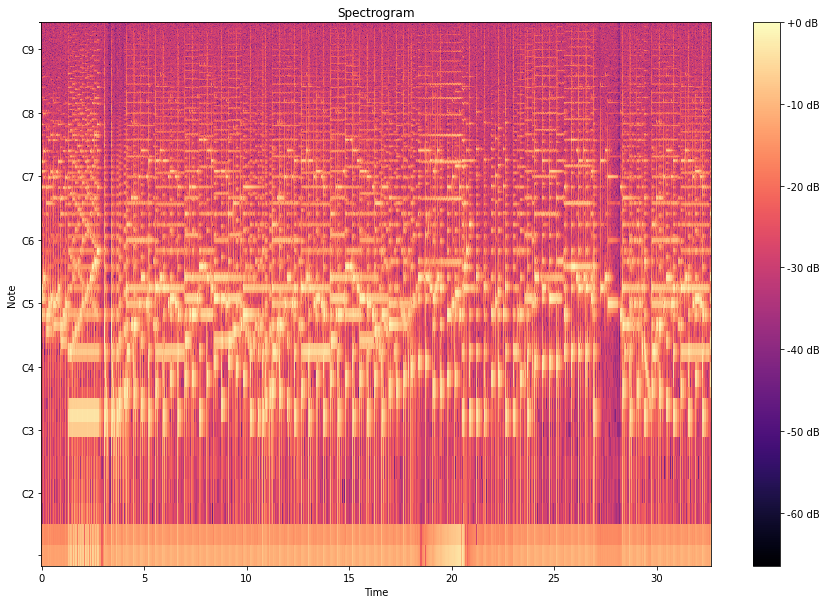

In [8]:
import librosa.display
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 72

scaled_spec = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(scaled_spec, y_axis='fft_note', x_axis='time');
plt.title('Spectrogram');
plt.colorbar(format='%+2.0f dB');

## Func

In [9]:
def spc_to_fft(
    infile: str, 
    hop_length: int = 512, 
): 
    y, sr = soundfile.read(BytesIO(
        ffmpeg
        .input(infile, **{"ss": 5, "t": 45})
        .output("pipe:", format='wav', acodec="pcm_u8", ar=16000, ac=1)
        #.get_args()
        .run(capture_stdout=True, capture_stderr=True)[0]
    ))
    return np.abs(librosa.stft(y, hop_length=hop_length, n_fft=hop_length*2))

In [ ]:
pip install cargan

In [10]:
import cargan

In [35]:
cargan.from_audio_file_to_file(["/home/vasilije/Documents/projects/ai_music/static/spctest.wav" ,"/home/vasilije/Documents/projects/ai_music/static/spctest2.wav", "/home/vasilije/Documents/projects/ai_music/static/spctest3.wav"  ],"/home/vasilije/Documents/projects/ai_music/static/rur.wav" ,cargan.DEFAULT_CHECKPOINT, None)

TypeError: expected str, bytes or os.PathLike object, not list

In [32]:
from IPython.display import Audio
Audio("../static/rur.wav")

In [19]:
list("/home/vasilije/Documents/projects/ai_music/static/spctest.wav", "/home/vasilije/Documents/projects/ai_music/static/audio/test1.wav")

TypeError: list expected at most 1 argument, got 2

In [20]:
list("/home/vasilije/Documents/projects/ai_music/static/spctest.wav")

['/',
 'h',
 'o',
 'm',
 'e',
 '/',
 'v',
 'a',
 's',
 'i',
 'l',
 'i',
 'j',
 'e',
 '/',
 'D',
 'o',
 'c',
 'u',
 'm',
 'e',
 'n',
 't',
 's',
 '/',
 'p',
 'r',
 'o',
 'j',
 'e',
 'c',
 't',
 's',
 '/',
 'a',
 'i',
 '_',
 'm',
 'u',
 's',
 'i',
 'c',
 '/',
 's',
 't',
 'a',
 't',
 'i',
 'c',
 '/',
 's',
 'p',
 'c',
 't',
 'e',
 's',
 't',
 '.',
 'w',
 'a',
 'v']